In [83]:
import pandas as pd
import numpy as np
from  skimage.io import imread, imshow
import pywt
import pywt.data

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc

pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 100)
pd.set_option('display.precision', 2)

# Agglomerative Clustering Algorithm
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# GMM
from sklearn.mixture import GaussianMixture

In [18]:
path=r'C:/Users/CLIFORD/Downloads/'
dfclases = pd.read_csv(path + "clase.txt")

# contando los valores presentes en las clases
dfclases.x.value_counts()

kidney         39
cerebellum     38
colon          34
hippocampus    31
liver          26
endometrium    15
placenta        6
Name: x, dtype: int64

In [19]:
# ordenando la tabla df_clases
dfclases["concated_name"] = dfclases["Unnamed: 0"].astype(str) + "_" + dfclases["x"]
list_names = list(dfclases["concated_name"])

In [20]:
# cargando la informacion genetetica
df = pd.read_csv(path + "dataset_tissue.txt")
df = df.iloc[:,1:]  
# renmbrando las columnas
df.columns = list_names
# transponiendo el dataframe
dft = df.T
dft

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,22175,22176,22177,22178,22179,22180,22181,22182,22183,22184,22185,22186,22187,22188,22189,22190,22191,22192,22193,22194,22195,22196,22197,22198,22199,22200,22201,22202,22203,22204,22205,22206,22207,22208,22209,22210,22211,22212,22213,22214
1_kidney,10.19,6.04,7.45,12.03,5.27,8.54,6.92,5.72,8.08,5.43,7.04,8.85,7.60,11.25,10.29,8.89,6.37,5.58,10.14,5.96,9.74,11.05,12.28,12.85,12.30,11.34,12.00,12.27,7.61,11.54,12.26,10.40,13.23,12.69,10.90,11.94,13.03,12.64,13.09,12.72,...,5.38,6.24,8.61,9.02,8.27,7.32,8.79,6.54,10.56,6.88,9.97,8.02,5.36,9.03,8.11,4.55,10.00,10.68,6.89,7.39,7.77,8.96,6.65,7.94,8.41,4.86,8.53,8.15,7.46,9.82,8.11,5.25,7.10,8.21,7.74,6.43,5.70,9.21,8.34,7.37
2_kidney,10.51,6.70,7.78,12.01,5.18,8.59,6.96,5.60,7.57,5.28,7.05,8.50,7.47,10.86,10.45,9.66,6.50,5.49,10.26,6.53,10.19,11.95,12.78,13.39,12.05,10.99,11.79,11.63,9.37,11.74,12.50,10.38,13.02,12.98,10.83,11.76,12.79,12.48,13.03,12.35,...,5.36,6.42,8.05,9.15,8.17,8.04,8.90,6.46,11.01,6.97,10.18,9.21,5.36,8.99,8.55,4.74,10.15,10.65,7.07,7.14,7.99,8.69,6.76,8.24,8.80,5.01,9.23,8.15,7.93,10.18,8.07,5.41,6.91,8.32,8.19,7.68,6.57,9.42,8.21,7.92
3_kidney,10.27,6.14,7.70,11.63,5.30,8.28,7.05,5.58,7.14,5.28,7.33,9.29,7.87,11.03,10.45,8.63,6.42,5.62,10.67,6.78,10.01,11.63,12.15,12.20,12.21,10.62,11.91,12.36,9.62,11.51,12.29,10.38,13.25,12.52,10.51,11.28,12.90,12.67,12.94,12.21,...,5.27,5.90,9.22,9.13,8.62,6.64,9.25,6.33,10.93,6.50,10.22,8.03,5.29,9.28,6.75,4.61,10.38,10.80,7.20,7.39,7.48,8.67,6.31,7.49,7.91,5.08,9.19,8.55,8.18,10.26,7.81,5.30,6.72,8.40,7.96,6.42,5.64,8.19,8.46,7.60
4_kidney,10.25,6.58,8.48,11.08,5.37,8.60,7.12,5.86,8.61,5.38,7.57,9.02,7.89,11.24,10.46,10.02,6.74,5.53,10.46,6.39,10.34,11.32,12.79,12.87,12.01,11.03,11.57,12.30,9.99,11.89,12.64,9.77,13.40,12.85,11.02,11.75,13.03,12.64,13.16,12.88,...,5.09,6.12,9.21,9.55,8.66,7.30,9.57,6.12,11.06,6.25,10.31,8.51,5.40,9.49,6.80,4.65,10.80,11.07,7.89,7.29,7.92,9.30,6.26,7.75,8.99,5.03,9.22,9.17,9.62,10.01,8.04,6.03,6.72,8.80,8.33,6.35,5.75,8.52,8.56,7.80
5_kidney,10.16,6.61,8.12,10.83,5.33,8.30,7.08,5.73,8.97,5.48,7.26,8.86,7.79,10.97,10.26,9.63,6.63,5.44,10.25,6.33,9.83,11.19,12.69,12.65,11.97,10.99,11.75,12.06,9.07,11.89,12.72,10.00,13.47,12.96,10.93,11.46,12.99,12.60,13.20,12.73,...,5.31,6.09,8.93,9.94,8.43,7.63,9.03,6.43,10.94,6.45,9.97,8.02,5.33,9.30,6.84,4.57,10.54,10.96,7.73,7.07,7.78,8.96,6.44,7.83,8.71,4.97,8.96,8.32,9.43,9.95,8.21,5.61,6.58,8.58,8.06,6.44,6.05,7.97,8.42,7.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185_placenta,9.80,6.06,7.49,9.91,5.31,7.42,6.91,5.78,6.55,5.44,6.91,8.26,7.53,9.44,10.13,8.61,6.19,5.22,9.54,5.46,9.05,9.25,12.28,11.61,12.73,11.20,11.82,12.02,10.77,12.19,12.66,10.02,13.10,12.62,11.37,11.82,12.97,12.36,13.21,12.22,...,5.44,6.21,8.16,8.85,7.47,7.18,8.95,6.32,10.77,6.32,9.52,7.00,5.45,9.20,5.81,4.57,9.75,10.40,7.11,7.05,7.74,8.96,6.52,8.18,5.95,5.22,8.70,8.28,6.92,9.87,7.10,5.36,7.10,7.97,6.79,6.22,7.33,8.45,8.34,7.66
186_placenta,10.51,6.35,7.47,9.91,5.34,7.90,6.98,6.00,6.78,5.37,9.38,9.22,7.64,9.84,11.68,8.66,6.80,5.37,10.26,6.91,10.32,11.29,12.17,12.35,12.60,10.81,11.28,11.87,10.45,11.74,12.32,10.85,12.98,12.15,10.86,11.40,12.83,12.32,13.13,11.75,...,5.21,6.06,8.79,9.24,7.47,7.05,8.59,6.15,11.03,6.24,9.85,8.76,5.43,9.17,6.19,4.60,10.00,10.64,7.18,6.90,7.83,9.09,6.65,7.47,5.87,5.02,8.74,8.72,6.93,10.42,7.06,5.43,7.05,7.16,7.92,6.42,10.26,9.30,8.26,8.07
187_placenta,9.98,6.72,7.12,9.41,4.90,8.12,6.81,5.97,6.58,5.42,10.23,9.57,7.52,9.37,9.91,8.89,6.75,5.78,9.98,9.40,10.86,10.70,12.51,13.24,12.18,11.13,11.62,11.65,10.77,11.88,12.42,10.20,13.06,12.80,10.98,11.80,12.61,12.11,13.20,12

In [22]:
def getname(x):
    res = x.split("_")
    return res[1]

dft["rawlabel"] = dft.index
dft["label"] = dft["rawlabel"].apply(lambda x:getname(x))
dft.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,22177,22178,22179,22180,22181,22182,22183,22184,22185,22186,22187,22188,22189,22190,22191,22192,22193,22194,22195,22196,22197,22198,22199,22200,22201,22202,22203,22204,22205,22206,22207,22208,22209,22210,22211,22212,22213,22214,rawlabel,label
1_kidney,10.19,6.04,7.45,12.03,5.27,8.54,6.92,5.72,8.08,5.43,7.04,8.85,7.60,11.25,10.29,8.89,6.37,5.58,10.14,5.96,9.74,11.05,12.28,12.85,12.30,11.34,12.00,12.27,7.61,11.54,12.26,10.40,13.23,12.69,10.90,11.94,13.03,12.64,13.09,12.72,...,8.61,9.02,8.27,7.32,8.79,6.54,10.56,6.88,9.97,8.02,5.36,9.03,8.11,4.55,10.00,10.68,6.89,7.39,7.77,8.96,6.65,7.94,8.41,4.86,8.53,8.15,7.46,9.82,8.11,5.25,7.10,8.21,7.74,6.43,5.70,9.21,8.34,7.37,1_kidney,kidney
2_kidney,10.51,6.70,7.78,12.01,5.18,8.59,6.96,5.60,7.57,5.28,7.05,8.50,7.47,10.86,10.45,9.66,6.50,5.49,10.26,6.53,10.19,11.95,12.78,13.39,12.05,10.99,11.79,11.63,9.37,11.74,12.50,10.38,13.02,12.98,10.83,11.76,12.79,12.48,13.03,12.35,...,8.05,9.15,8.17,8.04,8.90,6.46,11.01,6.97,10.18,9.21,5.36,8.99,8.55,4.74,10.15,10.65,7.07,7.14,7.99,8.69,6.76,8.24,8.80,5.01,9.23,8.15,7.93,10.18,8.07,5.41,6.91,8.32,8.19,7.68,6.57,9.42,8.21,7.92,2_kidney,kidney
3_kidney,10.27,6.14,7.70,11.63,5.30,8.28,7.05,5.58,7.14,5.28,7.33,9.29,7.87,11.03,10.45,8.63,6.42,5.62,10.67,6.78,10.01,11.63,12.15,12.20,12.21,10.62,11.91,12.36,9.62,11.51,12.29,10.38,13.25,12.52,10.51,11.28,12.90,12.67,12.94,12.21,...,9.22,9.13,8.62,6.64,9.25,6.33,10.93,6.50,10.22,8.03,5.29,9.28,6.75,4.61,10.38,10.80,7.20,7.39,7.48,8.67,6.31,7.49,7.91,5.08,9.19,8.55,8.18,10.26,7.81,5.30,6.72,8.40,7.96,6.42,5.64,8.19,8.46,7.60,3_kidney,kidney
4_kidney,10.25,6.58,8.48,11.08,5.37,8.60,7.12,5.86,8.61,5.38,7.57,9.02,7.89,11.24,10.46,10.02,6.74,5.53,10.46,6.39,10.34,11.32,12.79,12.87,12.01,11.03,11.57,12.30,9.99,11.89,12.64,9.77,13.40,12.85,11.02,11.75,13.03,12.64,13.16,12.88,...,9.21,9.55,8.66,7.30,9.57,6.12,11.06,6.25,10.31,8.51,5.40,9.49,6.80,4.65,10.80,11.07,7.89,7.29,7.92,9.30,6.26,7.75,8.99,5.03,9.22,9.17,9.62,10.01,8.04,6.03,6.72,8.80,8.33,6.35,5.75,8.52,8.56,7.80,4_kidney,kidney
5_kidney,10.16,6.61,8.12,10.83,5.33,8.30,7.08,5.73,8.97,5.48,7.26,8.86,7.79,10.97,10.26,9.63,6.63,5.44,10.25,6.33,9.83,11.19,12.69,12.65,11.97,10.99,11.75,12.06,9.07,11.89,12.72,10.00,13.47,12.96,10.93,11.46,12.99,12.60,13.20,12.73,...,8.93,9.94,8.43,7.63,9.03,6.43,10.94,6.45,9.97,8.02,5.33,9.30,6.84,4.57,10.54,10.96,7.73,7.07,7.78,8.96,6.44,7.83,8.71,4.97,8.96,8.32,9.43,9.95,8.21,5.61,6.58,8.58,8.06,6.44,6.05,7.97,8.42,7.54,5_kidney,kidney


In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [56]:
import numpy as np
from sklearn.mixture import GaussianMixture
# from sklearn.mixture import GMM

In [23]:
dfx = dft.iloc[:,0:22215]
yvals = dft.iloc[:,-1].values
# escalando la data
xarray = dfx.values
scaling=StandardScaler()
scaling.fit(xarray)
xscaled=scaling.transform(xarray)

In [84]:
# apñicando GMM a la data origina genera prolema de insuficiencia de RAM
# GMM = GaussianMixture(n_components=7, random_state=0).fit(dfx)

# para superar dicho detalle se realiza el proceso de LDA
lda = LDA(n_components = 6)
xldascaled = lda.fit_transform(xscaled, yvals)
xldascaled.shape
# dimensiones de la data luego de aplicar LDA

(189, 6)

In [87]:
# Aplicando GMM
gmm = GaussianMixture(n_components=7)
gmm.fit(xldascaled)

#predictions from gmm
labels = gmm.predict(xldascaled)
frame = pd.DataFrame(xldascaled)
frame['cluster'] = labels
frame.columns = [0 , 1 , 2 , 3 , 4 , 5 , 'cluster']
frame['origin'] = dfx.index
frame['origin'] = frame.origin.str.split(pat='_',expand=True).iloc[:,1]
frame

,0,1,2,3,4,5,cluster,origin
0,4.57,3.67,2.02,5.23,-2.08,-0.19,5,kidney
1,4.81,3.97,1.66,3.20,0.28,2.89,5,kidney
2,4.65,4.12,2.22,7.16,-1.05,2.09,5,kidney
3,4.45,1.72,1.17,6.14,-0.56,1.74,5,kidney
4,4.40,2.39,1.09,5.48,-1.45,3.10,5,kidney
...,...,...,...,...,...,...,...,...
184,6.41,0.06,1.17,-1.46,-7.99,-4.57,0,placenta
185,6.75,0.84,1.46,-2.17,-7.89,-5.24,0,placenta
186,7.25,0.97,1.47,-2.42,-11.52,-7.58,0,placenta
187,6.77,0.50,1.65,-1.64,-9.82,-6.14,0,placenta


In [96]:
# resultados 
frame.groupby(['origin','cluster'])['origin','cluster'].count()

<ipython-input-96-c3cce2778c82>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  frame.groupby(['origin','cluster'])['origin','cluster'].count()


,,origin,cluster
origin,cluster,,
cerebellum,4,38,38
colon,6,34,34
endometrium,1,15,15
hippocampus,3,31,31
kidney,5,39,39
liver,2,26,26
placenta,0,6,6


In [97]:
f0 = frame[frame['cluster']== 0]
f1 = frame[frame['cluster']== 1]
f2 = frame[frame['cluster']== 2]
f3 = frame[frame['cluster']== 3]
f4 = frame[frame['cluster']== 4]
f5 = frame[frame['cluster']== 5]
f6 = frame[frame['cluster']== 6]

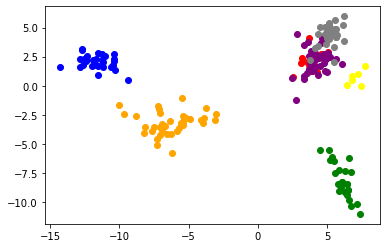

In [106]:
# plot three clusters in same plot
plt.scatter(f0[0], f0[1], c ='yellow')
plt.scatter(f1[0], f1[1], c ='red')
plt.scatter(f2[0], f2[1], c ='green')
plt.scatter(f3[0], f3[1], c ='blue')
plt.scatter(f4[0], f4[1], c ='orange')
plt.scatter(f5[0], f5[1], c ='purple')
plt.scatter(f6[0], f6[1], c ='grey')

In [107]:
print(gmm.lower_bound_)

-7.75994002554188


In [108]:
print(gmm.n_iter_)

2


Por lo tanto, se necesitan 2 iteraciones para que la log-verosimilitud converja. Si se realizan más iteraciones, no se observa ningún cambio apreciable en el valor de la log-verosimilitud